# Lead Scoring Case Study
### - Submitted by Thousif and Vivek

### Problem Statement 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

#### Goals of the Case Study
There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## Import Data

In [112]:
leads_df = pd.read_csv("Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [113]:
leads_df.shape

(9240, 37)

#### There are approximately 9.2k rows and 37 columns in the leads dataset

In [114]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### There are few columns which have null values which needs to handled

In [115]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [116]:
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

####  Inference : As observed above and mentioned in data dictonary as well the `'Prospect ID'` and `'Lead Number'` is a unique identity assigned to each row. Since we two variables with unique values we can drop both

#### Dropping `'Lead Number'` and `'Prospect ID'`

In [117]:
leads_df.drop(labels=['Lead Number', 'Prospect ID'], axis=1, inplace=True)
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Select columns which are not object but have less than 200 unique values to check if they can be converted to categorical

In [118]:
num_cols_with_less_unique_values = {}

for col in leads_df.select_dtypes(exclude=['object']).columns:
    if len(leads_df[col].unique()) <= 200:
        num_cols_with_less_unique_values[col] = len(leads_df[col].unique())
        
num_cols_with_less_unique_values     

{'Converted': 2,
 'TotalVisits': 42,
 'Page Views Per Visit': 115,
 'Asymmetrique Activity Score': 13,
 'Asymmetrique Profile Score': 11}

#### None of the above columns can be converted to categorical 

#### As mentioned in the question there are categorical columns having `'Select'` as a value, this should be replaced with appropriate null value np.NaN

In [119]:
categorical_columns = list(leads_df.select_dtypes(include=['object']).columns)
categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

#### Check how many columns has the value `'Select'` in them

In [120]:
leads_df.apply(lambda col: col.str.contains('Select'), axis=1).sum()

Lead Origin                                         0.0
Lead Source                                         0.0
Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
Page Views Per Visit                                0.0
Last Activity                                       0.0
Country                                             0.0
Specialization                                   1942.0
How did you hear about X Education               5043.0
What is your current occupation                     0.0
What matters most to you in choosing a course       0.0
Search                                              0.0
Magazine                                            0.0
Newspaper Article                                   0.0
X Education Forums                              

###### Replacing the `'Select'` with np.NaN

In [121]:
leads_df = leads_df.replace('Select', np.nan)

## Null Value Handling

In [122]:
# Get the percentage of null values for each columns in leads_df
percent_missing_values = round(100 * leads_df.isnull().sum()/leads_df.shape[0], 2)
percent_missing_values

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [123]:
# Let's drop the columns having more than 60% null values as they wouldn't offer much insights.
cols_with_high_nulls = percent_missing_values[percent_missing_values >= 60]
cols_with_high_nulls

How did you hear about X Education    78.46
Lead Profile                          74.19
dtype: float64

In [124]:
leads_df.drop(labels=list(cols_with_high_nulls.index), axis=1, inplace=True)

In [125]:
# Get the columns having missing values and sort by missing value percentage 
percent_missing_values = round(100 * leads_df.isnull().sum()/leads_df.shape[0], 2)
percent_missing_values[percent_missing_values > 0].sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

### Assessing `'Lead Quality'` for null values and it's imputation

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


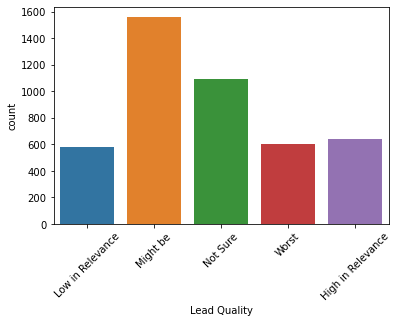

In [126]:
print(leads_df['Lead Quality'].value_counts())

sns.countplot(leads_df['Lead Quality'])
plt.xticks(rotation=45)
plt.show()

#### Inference : As the Lead Quality is based on the data and employee intuition we can easily assign a deafult of `'Not Sure'` to missing values in this column

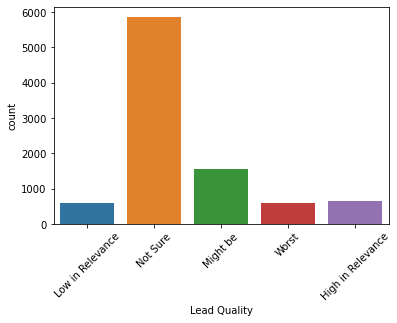

In [127]:
leads_df['Lead Quality'] = leads_df['Lead Quality'].replace(np.nan, 'Not Sure')

sns.countplot(leads_df['Lead Quality'])
plt.xticks(rotation=45)
plt.show()

### Assessing `'Asymmetrique Profile Score'`, `'Asymmetrique Profile Index'`  and `'Asymmetrique Activity Score'`, `'Asymmetrique Activity Index'` for null values and it's imputation

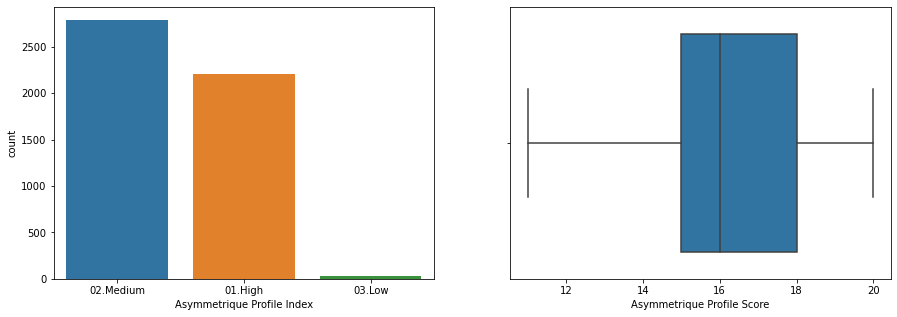

In [128]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(leads_df['Asymmetrique Profile Index'])

plt.subplot(1,2,2)
sns.boxplot(leads_df['Asymmetrique Profile Score'])

plt.show()

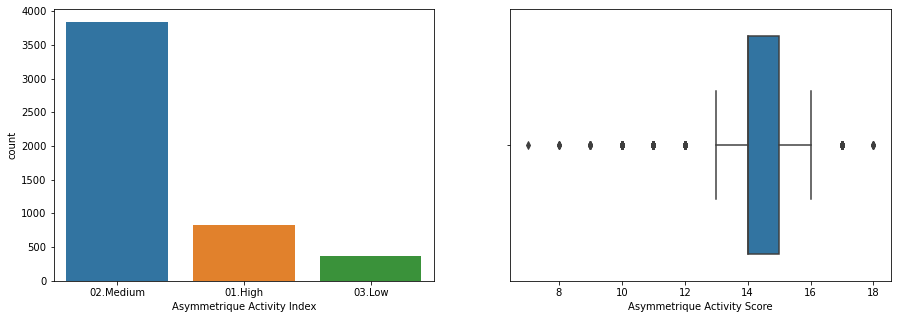

In [129]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(leads_df['Asymmetrique Activity Index'])

plt.subplot(1,2,2)
sns.boxplot(leads_df['Asymmetrique Activity Score'])

plt.show()

#### Inference : Since these columns don't have much information about the score and index is assigned we cannot impute the null values in these columns. It's better we can drop these columns as they have around 45% null values

In [130]:
leads_df.drop(labels=['Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Index','Asymmetrique Activity Score'], axis=1, inplace=True)

### Assessing `'City'` for null values and it's imputation

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64


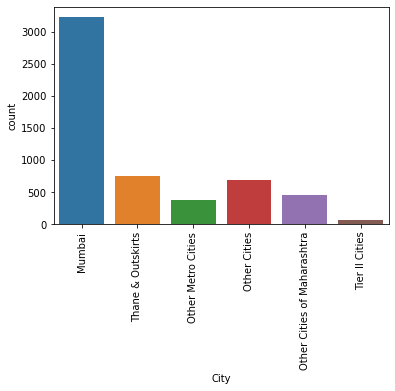

In [131]:
print(leads_df['City'].value_counts(normalize=True))

sns.countplot(leads_df['City'])
plt.xticks(rotation=90)
plt.show()

In [132]:
# As 60% of the data is Mumbai so we can impute Mumbai in the missing values.
leads_df['City'] = leads_df['City'].replace(np.nan, 'Mumbai')

### Assessing `'Specialization'` for null values and it's imputation

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64


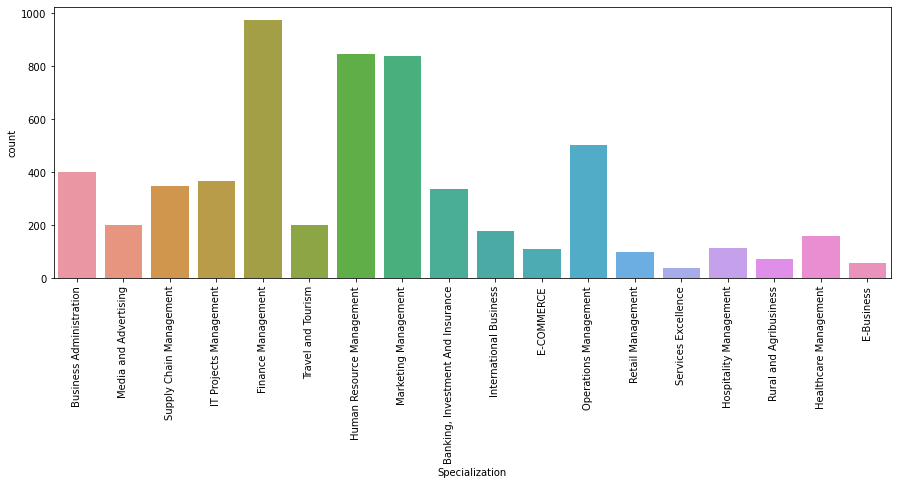

In [133]:
print(round(leads_df['Specialization'].value_counts(normalize=True)*100,2))

plt.figure(figsize=[15,5])
sns.countplot(leads_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

#### Inference : The customer might not have chosen the appropriate Specialization as it might have not been available or the customer didn't want to share it. So it would be safer to impute the np.NaN as `'Others'` 

In [134]:
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Others')

### Assessing `'Tags'` for null values and it's imputation

Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                    0.

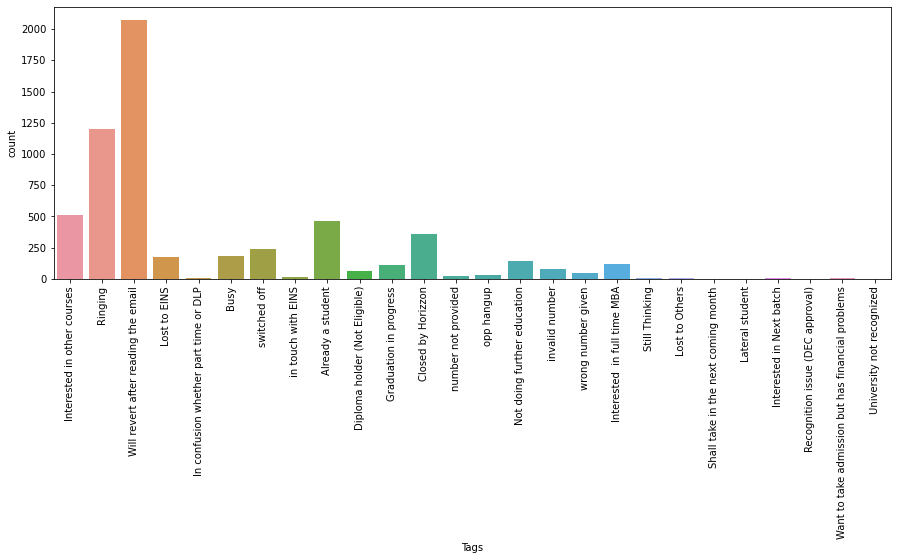

In [135]:
print(round(leads_df['Tags'].value_counts(normalize=True)*100,2))

plt.figure(figsize=[15,5])
sns.countplot(leads_df['Tags'])
plt.xticks(rotation=90)
plt.show()

#### Inference : We can input the the np.NaN values with most common value in this column `'Will revert after reading the email'` as this wouldn't incur any cost

In [136]:
leads_df['Tags'] = leads_df['Tags'].replace(np.nan, 'Will revert after reading the email')

### Assessing `'What matters most to you in choosing a course'` for null values and it's imputation 

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64


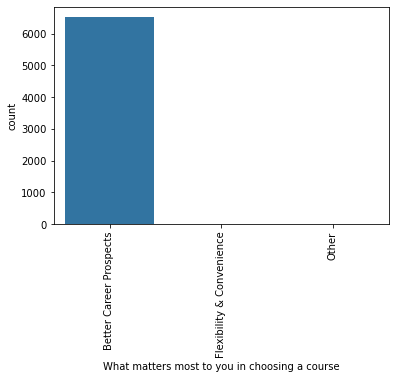

In [137]:
print(round(leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100,2))

sns.countplot(leads_df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

#### Inference : We can input the the np.NaN values with most common value in this column `'Better Career Prospects'`

In [138]:
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(
    np.nan, 'Better Career Prospects')

### Assessing `'What is your current occupation'` for null values and it's imputation 

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64


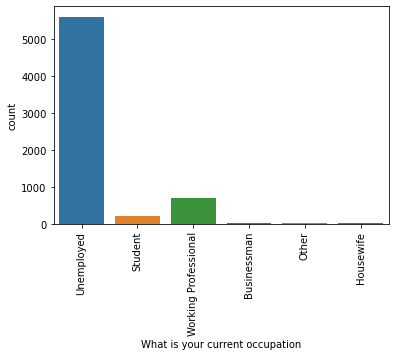

In [139]:
print(round(leads_df['What is your current occupation'].value_counts(normalize=True)*100,2))

sns.countplot(leads_df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

#### Inference : As 86% entries are of Unemployed so we can impute "Unemployed" for the above column

In [140]:
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

### Assessing `'Country'` for null values and it's imputation

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Bahrain                  0.10
Hong Kong                0.10
Oman                     0.09
France                   0.09
unknown                  0.07
Canada                   0.06
Kuwait                   0.06
Germany                  0.06
Nigeria                  0.06
South Africa             0.06
Sweden                   0.04
Bangladesh               0.03
China                    0.03
Belgium                  0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Netherlands              0.03
Philippines              0.03
Ghana                    0.03
Italy                    0.03
Malaysia                 0.01
Liberia                  0.01
Vietnam                  0.01
Kenya                    0.01
Switzerland              0.01
Sri Lanka 

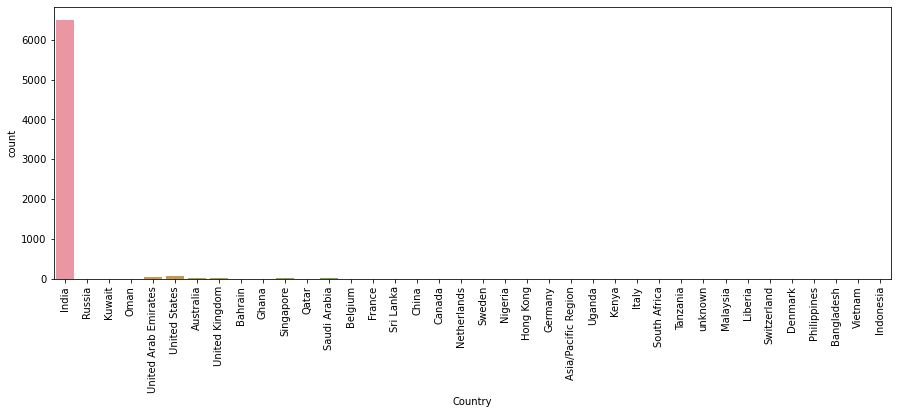

In [141]:
print(round(leads_df['Country'].value_counts(normalize=True)*100,2))

plt.figure(figsize=[15,5])

sns.countplot(leads_df['Country'])
plt.xticks(rotation=90)
plt.show()

#### Inference : India is the most repeated value for `'Country'` so let's impute the same in missing values.


In [142]:
leads_df['Country'] = leads_df['Country'].replace(np.nan, 'India')

In [143]:
# Get the columns having missing values and sort by missing value percentage 
percent_missing_values = round(100 * leads_df.isnull().sum()/leads_df.shape[0], 2)
percent_missing_values[percent_missing_values > 0].sort_values(ascending=False)

Page Views Per Visit    1.48
TotalVisits             1.48
Last Activity           1.11
Lead Source             0.39
dtype: float64

#### For the rest of the columns the missing value percentage is very low so we can drop the corresponding rows

In [144]:
leads_df.dropna(inplace = True)

In [145]:
leads_df.shape

(9074, 29)

## Exploratory Data Analysis

#### As the data has been cleaned let's proceed with EDA

### Univariate and Segmented Analysis

In [146]:
categorical_columns = leads_df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = leads_df.select_dtypes(include=np.number).columns.tolist()

print("Categorical Columns --->", categorical_columns)
print("\n\nNumerical Columns --->", numerical_columns)

Categorical Columns ---> ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


Numerical Columns ---> ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


#### We will perform univariate analysis with respect to our target variable `'Converted'`

In [147]:
BOLD = '\033[1m'
END = '\033[0m'

def display_in_bold(statement):
    print(BOLD + statement + END)
    

def get_stats_and_cat_segmented_plot(col_name, fig_size, rotate_xticks, is_plot=True):
    
        display_in_bold(BOLD + '\nDistribution of `{0}` with respect to Target Variable'.format(col_name) + END)
        display(leads_df.groupby(by=col_name).agg({'Converted':['count','sum','mean']}))
        
        if not fig_size:
            fig_size=[15,6]
        
        if not rotate_xticks:
            rotate_xticks=90
            
        if not is_plot:
            return
            
        display_in_bold("\nPlots comparison without and with Converted variable segmentation\n")
        
        plt.figure(figsize=fig_size)
        
        plt.subplot(1,2,1)
        sns.countplot(x=col_name, data=leads_df)
        plt.xlabel(col_name)
        if rotate_xticks:
            plt.xticks(rotation=rotate_xticks)

        plt.subplot(1,2,2)
        sns.countplot(x=col_name, hue='Converted' ,data=leads_df)
        plt.xlabel("{0} w.r.t Converted".format(col_name))
        if rotate_xticks:
            plt.xticks(rotation=rotate_xticks)

        plt.show()

#### `'Lead Origin'` Analysis


Distribution of `Lead Origin` with respect to Target Variable


Converted                
                            count   sum      mean
Lead Origin                                      
API                          3578  1115  0.311627
Landing Page Submission      4885  1767  0.361720
Lead Add Form                 581   544  0.936317
Lead Import                    30     9  0.300000


Plots comparison without and with Converted variable segmentation



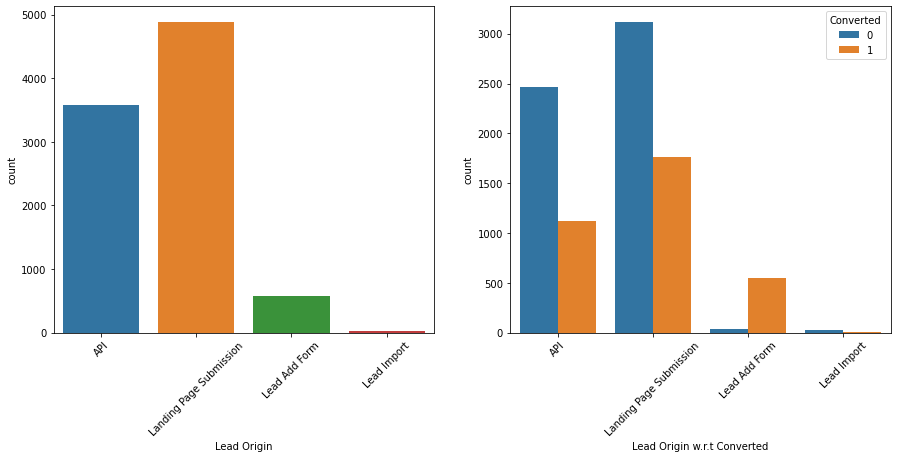

In [148]:
get_stats_and_cat_segmented_plot('Lead Origin',[], 45)

#### Inference
- Lead Add Form has highest conversion rate(90%) but number of leads are low.
- API and Landing Page Submission have lower conversion rate compared to Lead Add Form but number of leads originated from them are higher.
- Lead Import are very less in count.

**We need to focus more on improving lead converion of API and Landing Page Submission as they have higher number of lead origin. Probably the company can increase their marketing spend to capture more visits to their sites and company should also try to improvise on generating more leads from Lead Add Form.**

#### `'Lead Source'` Analysis


Distribution of `Lead Source` with respect to Target Variable


Converted                
                      count   sum      mean
Lead Source                                
Click2call                4     3  0.750000
Direct Traffic         2543   818  0.321667
Facebook                 31     9  0.290323
Google                 2868  1147  0.399930
Live Chat                 2     2  1.000000
NC_EDM                    1     1  1.000000
Olark Chat             1753   448  0.255562
Organic Search         1154   436  0.377816
Pay per Click Ads         1     0  0.000000
Press_Release             2     0  0.000000
Reference               443   410  0.925508
Referral Sites          125    31  0.248000
Social Media              2     1  0.500000
WeLearn                   1     1  1.000000
Welingak Website        129   127  0.984496
bing                      6     1  0.166667
blog                      1     0  0.000000
google                    5     0  0.000000
testone                   1     0  0.000000
welearnblog_Home          1     0  0.000000
youtubechannel            1     0  0.000000


Plots comparison without and with Converted variable segmentation



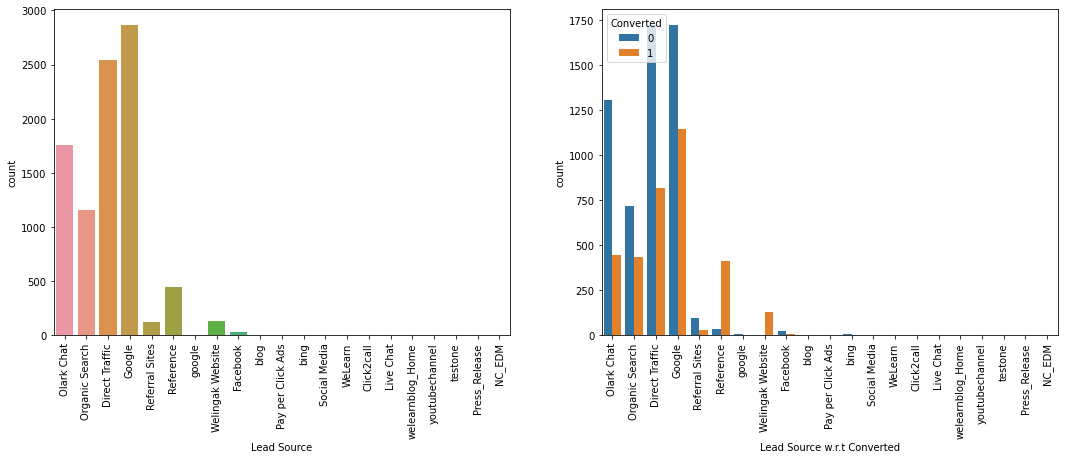

In [149]:
get_stats_and_cat_segmented_plot('Lead Source',[18,6], 90)

- As we can see from the above graph and statistics there are two different representation of Google, we should combine them to make it more accurate. 
- Also many Lead Source which have very less values can be combined as one single category called 'Others' which helps in reducing the number of variables used for model building

In [150]:
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['google'], 'Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


Distribution of `Lead Source` with respect to Target Variable


Converted                
                     count   sum      mean
Lead Source                               
Direct Traffic        2543   818  0.321667
Facebook                31     9  0.290323
Google                2873  1147  0.399234
Olark Chat            1753   448  0.255562
Organic Search        1154   436  0.377816
Others                  23     9  0.391304
Reference              443   410  0.925508
Referral Sites         125    31  0.248000
Welingak Website       129   127  0.984496


Plots comparison without and with Converted variable segmentation



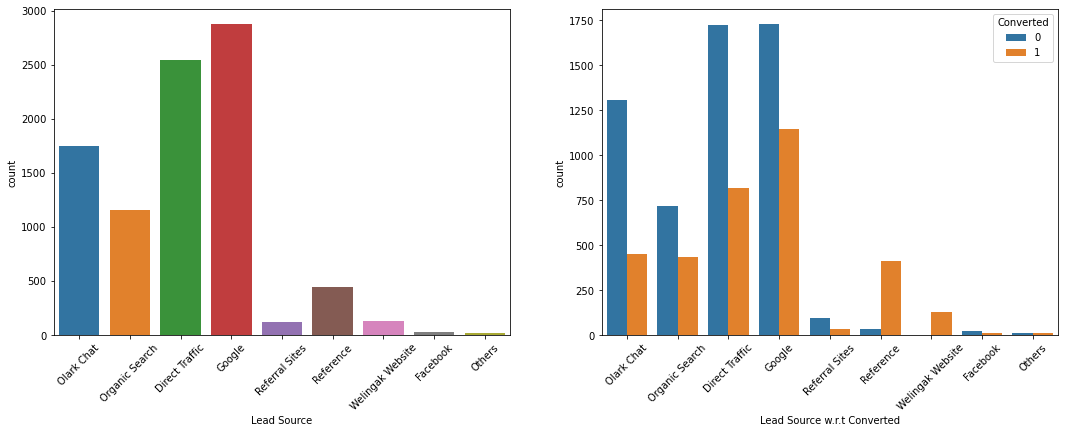

In [151]:
get_stats_and_cat_segmented_plot('Lead Source',[18,6], 45)

#### Inference :
- The top four Lead Source's are Google, Direc Traffic, Olark Chat and Organic Search
- Reference and Welingak Website have higher conversion rate than other Lead Sources

**The company X should promote more Referal bonus within the company if possible to increase conversion rate.
Company can work on Search Engine Optimization to increase more direct traffic and tie-up with Google for more ads which could lead to possibly more conversion**

#### `'Do Not Email'` Analysis


Distribution of `Do Not Email` with respect to Target Variable


Converted                
                 count   sum      mean
Do Not Email                          
No                8358  3331  0.398540
Yes                716   104  0.145251


Plots comparison without and with Converted variable segmentation



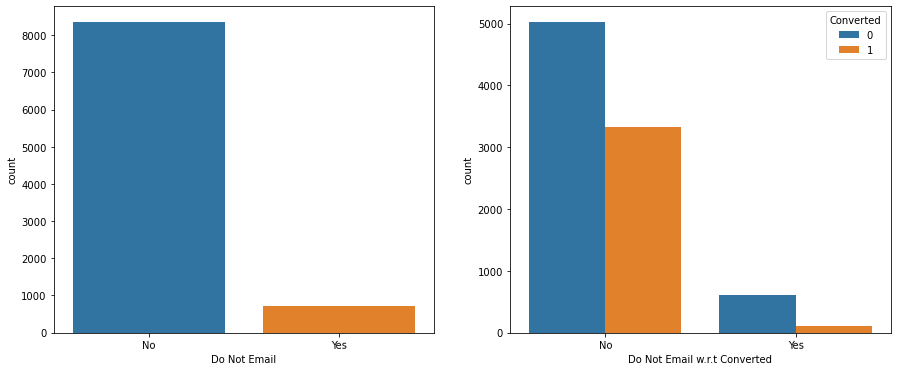

In [152]:
get_stats_and_cat_segmented_plot('Do Not Email',[], 1)

#### Inference :
- There is 40% conversion in people who have opted for email

#### `'Do Not Call'` Analysis


Distribution of `Do Not Call` with respect to Target Variable


Converted                
                count   sum      mean
Do Not Call                          
No               9072  3433  0.378417
Yes                 2     2  1.000000


Plots comparison without and with Converted variable segmentation



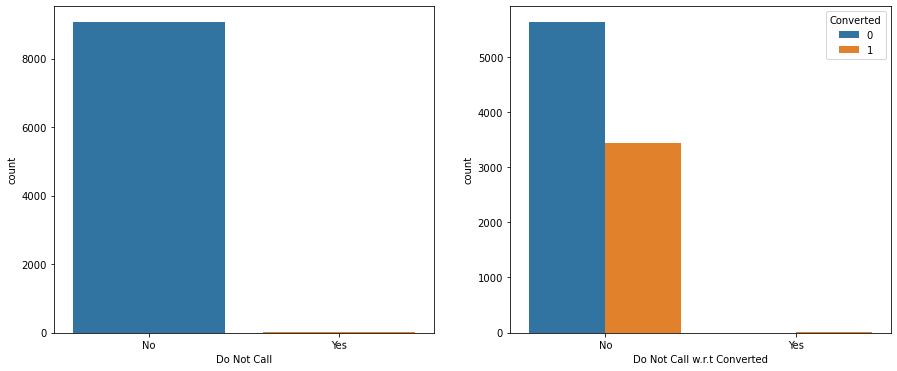

In [153]:
get_stats_and_cat_segmented_plot('Do Not Call',[], 1)

#### Inference :
- Among all the people who have responded for `'Do Not Call'`, the people who have opted for a call have conversion rate of 37%

#### `'Last Activity'` Analysis


Distribution of `Last Activity` with respect to Target Variable


Converted                
                                 count   sum      mean
Last Activity                                         
Approached upfront                   5     5  1.000000
Converted to Lead                  428    54  0.126168
Email Bounced                      312    16  0.051282
Email Link Clicked                 267    73  0.273408
Email Marked Spam                    2     2  1.000000
Email Opened                      3432  1250  0.364219
Email Received                       2     2  1.000000
Form Submitted on Website          116    28  0.241379
Had a Phone Conversation            25    20  0.800000
Olark Chat Conversation            972    84  0.086420
Page Visited on Website            640   151  0.235937
Resubscribed to emails               1     1  1.000000
SMS Sent                          2716  1705  0.627761
Unreachable                         90    29  0.322222
Unsubscribed                        59    14  0.237288
View in browser link Clicked         6     1  0.166667
Visited Booth in Tradeshow           1     0  0.000000


Plots comparison without and with Converted variable segmentation



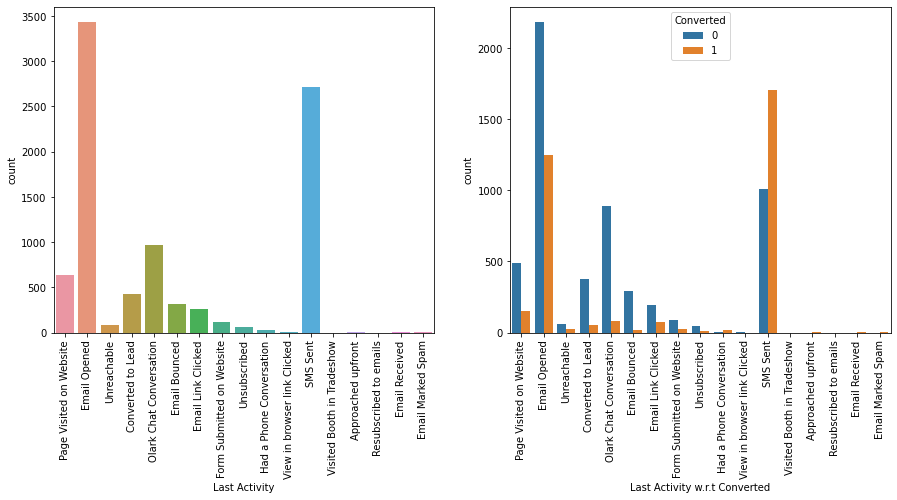

In [154]:
get_stats_and_cat_segmented_plot('Last Activity',[15,6], 90)

- There are many levels/categories which have very less values can be combined as one single category called 'Others' which helps in reducing the number of variables used for model building

In [155]:
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Email Marked Spam','Email Received','Resubscribed to emails',
'View in browser link Clicked','Visited Booth in Tradeshow'], 'Others')


Distribution of `Last Activity` with respect to Target Variable


Converted                
                              count   sum      mean
Last Activity                                      
Approached upfront                5     5  1.000000
Converted to Lead               428    54  0.126168
Email Bounced                   312    16  0.051282
Email Link Clicked              267    73  0.273408
Email Opened                   3432  1250  0.364219
Form Submitted on Website       116    28  0.241379
Had a Phone Conversation         25    20  0.800000
Olark Chat Conversation         972    84  0.086420
Others                           12     6  0.500000
Page Visited on Website         640   151  0.235937
SMS Sent                       2716  1705  0.627761
Unreachable                      90    29  0.322222
Unsubscribed                     59    14  0.237288


Plots comparison without and with Converted variable segmentation



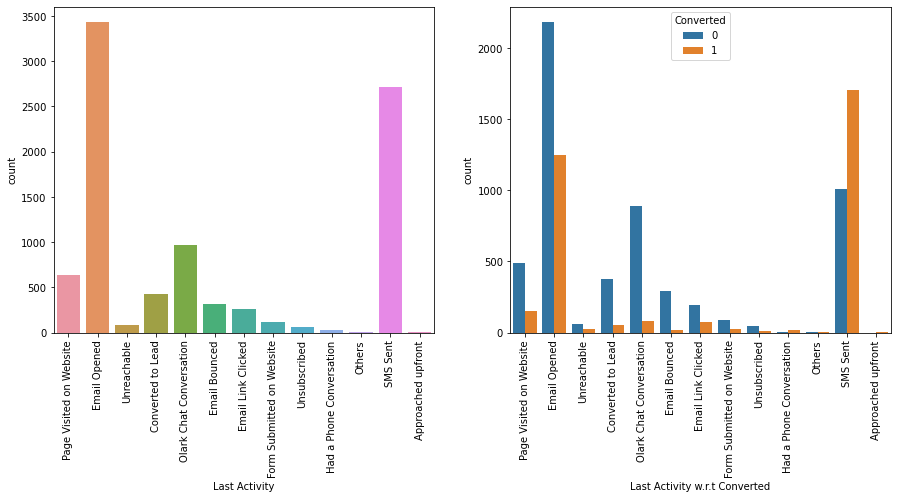

In [156]:
get_stats_and_cat_segmented_plot('Last Activity',[15,6], 90)

#### Inference :
- SMS Sent and Email Opened activites have higher conversion rate. The sales team can talk to these people directly and try to increase the conversion rate by explaining the advantages of the courses and difference in the content offered by them v/s company X competitors or provide a discount if possible to such customers 

#### `'Country'` Analysis

In [157]:
get_stats_and_cat_segmented_plot('Country',[15,6], 90, False)


Distribution of `Country` with respect to Target Variable


Converted                
                         count   sum      mean
Country                                       
Asia/Pacific Region          2     1  0.500000
Australia                   13     3  0.230769
Bahrain                      7     4  0.571429
Bangladesh                   2     1  0.500000
Belgium                      2     0  0.000000
Canada                       4     0  0.000000
China                        2     0  0.000000
Denmark                      1     1  1.000000
France                       6     3  0.500000
Germany                      4     1  0.250000
Ghana                        2     0  0.000000
Hong Kong                    7     4  0.571429
India                     8787  3351  0.381359
Indonesia                    1     0  0.000000
Italy                        2     0  0.000000
Kenya                        1     0  0.000000
Kuwait                       4     0  0.000000
Liberia                      1     0  0.000000
Malaysia                     1     0  0.000000
Netherlands                  2     1  0.500000
Nigeria                      4     0  0.000000
Oman                         6     3  0.500000
Philippines                  2     0  0.000000
Qatar                       10     1  0.100000
Russia                       1     0  0.000000
Saudi Arabia                21     4  0.190476
Singapore                   24    11  0.458333
South Africa                 4     1  0.250000
Sri Lanka                    1     0  0.000000
Sweden                       3     1  0.333333
Switzerland                  1     0  0.000000
Tanzania                     1     0  0.000000
Uganda                       2     0  0.000000
United Arab Emirates        53    20  0.377358
United Kingdom              15     5  0.333333
United States               69    18  0.260870
Vietnam                      1     0  0.000000
unknown                      5     1  0.200000

#### Inference :
- Many of the data points are from India 

**The country data is heavily skewed towards india. To balance this all the data from other countries will be clubbed together as 'other_Countries'**

In [158]:
country_unique = leads_df.Country.unique()
country_cols = country_unique.tolist()
country_cols.remove('India')
country_cols

['Russia',
 'Kuwait',
 'Oman',
 'United Arab Emirates',
 'United States',
 'Australia',
 'United Kingdom',
 'Bahrain',
 'Ghana',
 'Singapore',
 'Qatar',
 'Saudi Arabia',
 'Belgium',
 'France',
 'Sri Lanka',
 'China',
 'Canada',
 'Netherlands',
 'Sweden',
 'Nigeria',
 'Hong Kong',
 'Germany',
 'Asia/Pacific Region',
 'Uganda',
 'Kenya',
 'Italy',
 'South Africa',
 'Tanzania',
 'unknown',
 'Malaysia',
 'Liberia',
 'Switzerland',
 'Denmark',
 'Philippines',
 'Bangladesh',
 'Vietnam',
 'Indonesia']

In [159]:
leads_df['Country'] = leads_df['Country'].replace(country_cols, 'OtherCountry')


In [160]:
get_stats_and_cat_segmented_plot('Country',[15,6], 90, False)


Distribution of `Country` with respect to Target Variable


Converted                
                 count   sum      mean
Country                               
India             8787  3351  0.381359
OtherCountry       287    84  0.292683

#### `'Specialization'` Analysis


Distribution of `Specialization` with respect to Target Variable


Converted               
                                      count  sum      mean
Specialization                                            
Banking, Investment And Insurance       335  164  0.489552
Business Administration                 399  175  0.438596
E-Business                               57   21  0.368421
E-COMMERCE                              111   39  0.351351
Finance Management                      959  422  0.440042
Healthcare Management                   156   76  0.487179
Hospitality Management                  111   45  0.405405
Human Resource Management               837  380  0.454002
IT Projects Management                  366  140  0.382514
International Business                  176   62  0.352273
Marketing Management                    823  397  0.482382
Media and Advertising                   202   84  0.415842
Operations Management                   499  234  0.468938
Others                                 3282  901  0.274528
Retail Management                       100   34  0.340000
Rural and Agribusiness                   73   31  0.424658
Services Excellence                      40   11  0.275000
Supply Chain Management                 346  148  0.427746
Travel and Tourism                      202   71  0.351485


Plots comparison without and with Converted variable segmentation



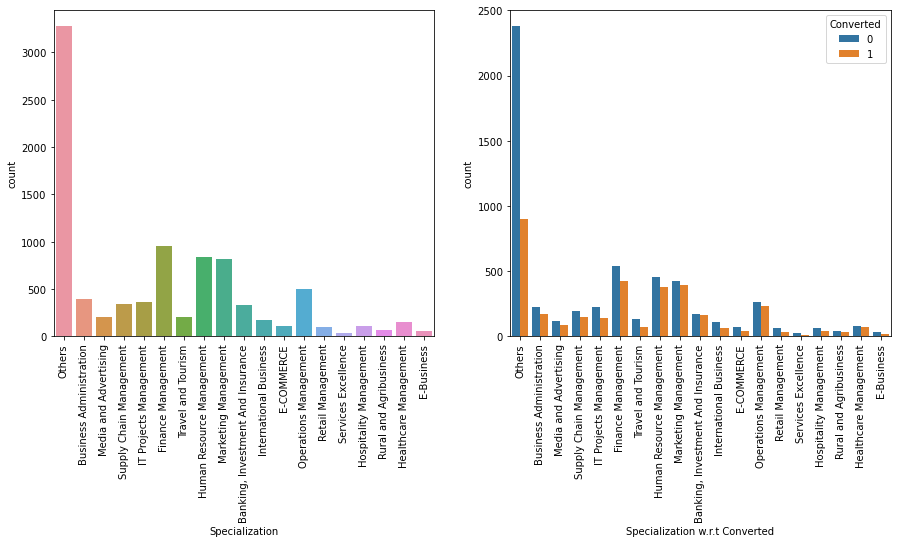

In [161]:
get_stats_and_cat_segmented_plot('Specialization',[15,6], 90)

#### Inference :
- Many data points have not specified their Specialization ('Others category was replaced by np.NaN')
- Higher conversion rates are observed in Human Resource Management, Finance Management, Banking, Investment And Insurance, Business Administration and few others	

#### `'What is your current occupation'` Analysis


Distribution of `What is your current occupation` with respect to Target Variable


Converted                
                                    count   sum      mean
What is your current occupation                          
Businessman                             8     5  0.625000
Housewife                               9     9  1.000000
Other                                  15     9  0.600000
Student                               206    74  0.359223
Unemployed                           8159  2716  0.332884
Working Professional                  677   622  0.918759


Plots comparison without and with Converted variable segmentation



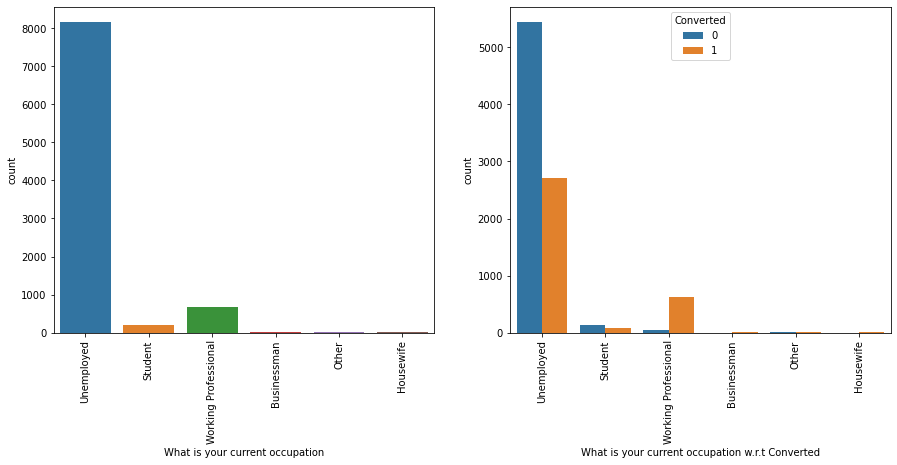

In [162]:
get_stats_and_cat_segmented_plot('What is your current occupation',[15,6], 90)

#### Inference :
- Unemployed category is the biggest contributor to conversion rate
- But Working Professional seem to have higher conversion rate 

**The company X can focus more on reaching out to Working Professionals to improvise conversion rate apart from the Unemployed people**

#### `'What matters most to you in choosing a course'` Analysis

In [163]:
get_stats_and_cat_segmented_plot('What matters most to you in choosing a course',[15,6], 90, False)


Distribution of `What matters most to you in choosing a course` with respect to Target Variable


Converted                
                                                  count   sum      mean
What matters most to you in choosing a course                          
Better Career Prospects                            9072  3434  0.378527
Flexibility & Convenience                             1     1  1.000000
Other                                                 1     0  0.000000

#### Inference :
- Not much variation is present in this column and cannot infer much

####  Analysis of  :
`'Search'`, 
`'Magazine'`, 
`'Newspaper Article'`, 
`'X Education Forums'`, 
`'Newspaper'`

In [164]:
columns = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper' ]
for col in columns:
    get_stats_and_cat_segmented_plot(col,[15,6], 90, False)


Distribution of `Search` with respect to Target Variable


Converted                
           count   sum      mean
Search                          
No          9060  3430  0.378587
Yes           14     5  0.357143


Distribution of `Magazine` with respect to Target Variable


Converted                
             count   sum      mean
Magazine                          
No            9074  3435  0.378554


Distribution of `Newspaper Article` with respect to Target Variable


Converted                
                      count   sum      mean
Newspaper Article                          
No                     9072  3434  0.378527
Yes                       2     1  0.500000


Distribution of `X Education Forums` with respect to Target Variable


Converted                
                       count   sum      mean
X Education Forums                          
No                      9073  3435  0.378596
Yes                        1     0  0.000000


Distribution of `Newspaper` with respect to Target Variable


Converted                
              count   sum      mean
Newspaper                          
No             9073  3435  0.378596
Yes               1     0  0.000000

#### Inference :
- As there is not much variation in this columns we cannot infer much from the above

####  Analysis of  :
`'Digital Advertisement'`, 
`'Through Recommendations'`, 
`'Receive More Updates About Our Courses'`, 
`'Update me on Supply Chain Content'`, 
`'Get updates on DM Content'` 

In [165]:
columns = ['Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
           'Update me on Supply Chain Content', 'Get updates on DM Content' ]
for col in columns:
    get_stats_and_cat_segmented_plot(col,[15,6], 90, False)


Distribution of `Digital Advertisement` with respect to Target Variable


Converted                
                          count   sum      mean
Digital Advertisement                          
No                         9070  3434  0.378611
Yes                           4     1  0.250000


Distribution of `Through Recommendations` with respect to Target Variable


Converted                
                            count   sum      mean
Through Recommendations                          
No                           9067  3430  0.378295
Yes                             7     5  0.714286


Distribution of `Receive More Updates About Our Courses` with respect to Target Variable


Converted                
                                           count   sum      mean
Receive More Updates About Our Courses                          
No                                          9074  3435  0.378554


Distribution of `Update me on Supply Chain Content` with respect to Target Variable


Converted                
                                      count   sum      mean
Update me on Supply Chain Content                          
No                                     9074  3435  0.378554


Distribution of `Get updates on DM Content` with respect to Target Variable


Converted                
                              count   sum      mean
Get updates on DM Content                          
No                             9074  3435  0.378554

#### Inference :
- As there is not much variation in this columns we cannot infer much from the above

#### Analysis of `'Lead Quality'`


Distribution of `Lead Quality` with respect to Target Variable


Converted                
                      count   sum      mean
Lead Quality                               
High in Relevance       592   558  0.942568
Low in Relevance        556   455  0.818345
Might be               1519  1150  0.757077
Not Sure               5806  1260  0.217017
Worst                   601    12  0.019967


Plots comparison without and with Converted variable segmentation



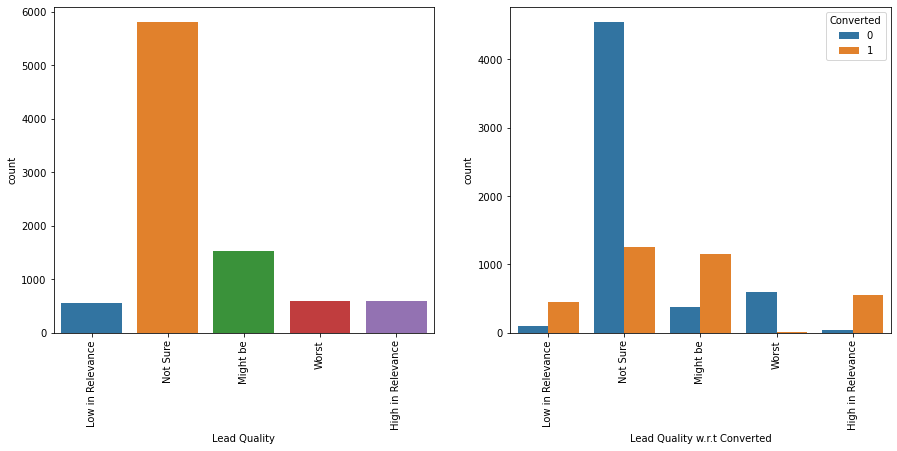

In [166]:
get_stats_and_cat_segmented_plot('Lead Quality',[15,6], 90)

#### Inference :
- The categories/levels 'Might Be', 'High In Relevance' and 'Low in Relevance' can higher conversion rate but the number of data points with these values are low compared to 'Not Sure'

**The company can focus on people with the categories having higher conversion rate to improvise further by introducing discounts or understanding the expectation from the course from such people**

#### Analysis of `'City'`


Distribution of `City` with respect to Target Variable


Converted                
                                count   sum      mean
City                                                 
Mumbai                           6752  2456  0.363744
Other Cities                      680   272  0.400000
Other Cities of Maharashtra       446   196  0.439462
Other Metro Cities                377   154  0.408488
Thane & Outskirts                 745   332  0.445638
Tier II Cities                     74    25  0.337838


Plots comparison without and with Converted variable segmentation



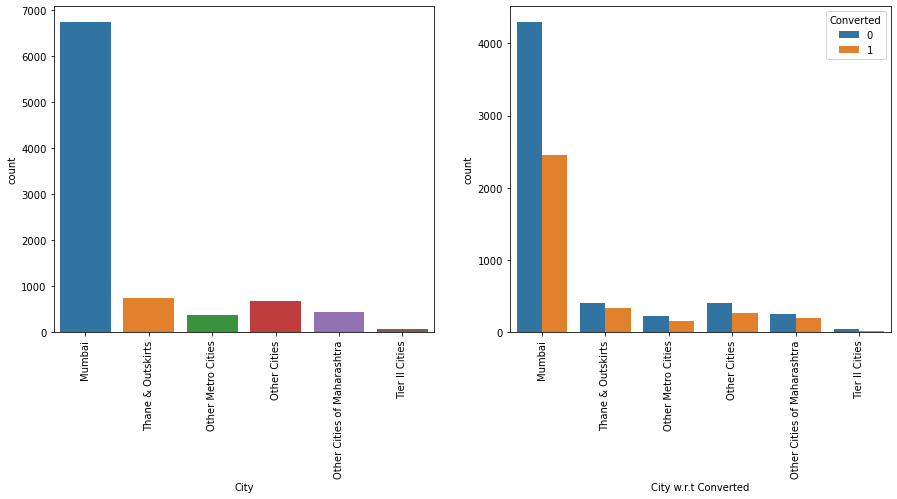

In [167]:
get_stats_and_cat_segmented_plot('City',[15,6], 90)

#### Inference :
- The sales employee can focus on poeple from Maharasthra to improvise the conversion rate as Mumbai and other cities of Maharashtra have higher conversion rate and also represent majority of data population

#### `'Tags'` Analysis

In [168]:
get_stats_and_cat_segmented_plot('Tags',[15,6], 90, False)


Distribution of `Tags` with respect to Target Variable


Converted                
                                                      count   sum      mean
Tags                                                                       
Already a student                                       465     3  0.006452
Busy                                                    185   105  0.567568
Closed by Horizzon                                      301   299  0.993355
Diploma holder (Not Eligible)                            63     1  0.015873
Graduation in progress                                  111     7  0.063063
In confusion whether part time or DLP                     5     1  0.200000
Interested  in full time MBA                            116     3  0.025862
Interested in Next batch                                  5     5  1.000000
Interested in other courses                             509    13  0.025540
Lateral student                                           3     3  1.000000
Lost to EINS                                            172   168  0.976744
Lost to Others                                            7     0  0.000000
Not doing further education                             145     1  0.006897
Recognition issue (DEC approval)                          1     0  0.000000
Ringing                                                1187    34  0.028644
Shall take in the next coming month                       2     1  0.500000
Still Thinking                                            6     1  0.166667
University not recognized                                 2     0  0.000000
Want to take admission but has financial problems         6     2  0.333333
Will revert after reading the email                    5343  2777  0.519745
in touch with EINS                                       12     3  0.250000
invalid number                                           83     1  0.012048
number not provided                                      25     0  0.000000
opp hangup                                               33     3  0.090909
switched off                                            240     4  0.016667
wrong number given                                       47     0  0.000000

#### The levels/categories with less data points can be combined as on single category 'OtherTags' 

In [169]:
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP','Interested in Next batch','Lateral student',
'Lost to Others','Recognition issue (DEC approval)','Shall take in the next coming month','Still Thinking',
'University not recognized','Want to take admission but has financial problems','in touch with EINS','number not provided',
'opp hangup', 'Graduation in progress', 'Interested in full time MBA', 'Not doing further education', 'invalid number', 
                                            'switched off', 'wrong number given', 'Diploma holder (Not Eligible)', 'Already a student', 
                                            ], 'OtherTags')


Distribution of `Tags` with respect to Target Variable


Converted                
                                        count   sum      mean
Tags                                                         
Busy                                      185   105  0.567568
Closed by Horizzon                        301   299  0.993355
Interested  in full time MBA              116     3  0.025862
Interested in other courses               509    13  0.025540
Lost to EINS                              172   168  0.976744
OtherTags                                1261    36  0.028549
Ringing                                  1187    34  0.028644
Will revert after reading the email      5343  2777  0.519745


Plots comparison without and with Converted variable segmentation



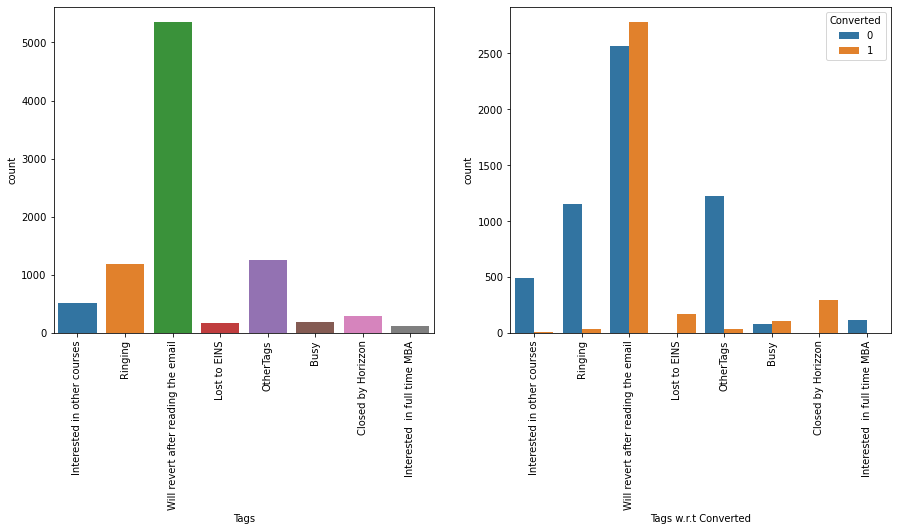

In [170]:
get_stats_and_cat_segmented_plot('Tags',[15,6], 90, True)

#### Inference : 
- 'Will Revert After Reading Email' has higher conversion rate and higher representation.
- 'Busy' and 'Closed By Horizon' have next higher conversion rate apart form the above.

**Company can spend some quality time in strategizing email campaigns to improve conversion rate**

In [171]:
def get_stats_and_numerical_segmented_plot(col_name, fig_size, is_plot=True):
    
        display_in_bold(BOLD + '\nPercentiles values for `{0}`'.format(col_name) + END)
        display(leads_df[col_name].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]))
        
        if not is_plot:
            return
        
        if not fig_size:
            fig_size=[15,6]
            
        display_in_bold("\nPlots comparison without and with Converted variable segmentation\n")
        
        plt.figure(figsize=fig_size)
        
        plt.subplot(1,2,1)
        sns.boxplot(y=col_name, data=leads_df)

        plt.subplot(1,2,2)
        sns.boxplot(y=col_name, x='Converted', data=leads_df)
        
        plt.show()

#### `'TotalVisits'` Analysis

In [172]:
get_stats_and_numerical_segmented_plot('TotalVisits', [], False)


Percentiles values for `TotalVisits`


count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

As we can see there are few outliers which can be capped

In [173]:
percentiles = leads_df['TotalVisits'].quantile([0.05,0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentiles[1]] = percentiles[1]


Percentiles values for `TotalVisits`


count    9074.000000
mean        3.191867
std         2.780618
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        10.000000
max        10.000000
Name: TotalVisits, dtype: float64


Plots comparison without and with Converted variable segmentation



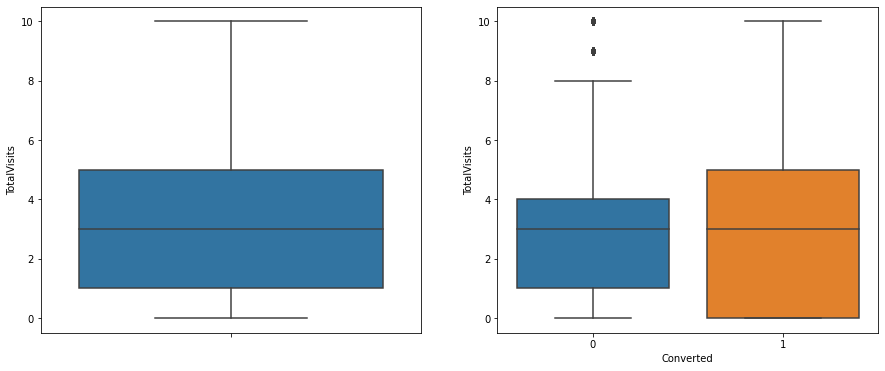

In [174]:
get_stats_and_numerical_segmented_plot('TotalVisits', [], True)

#### Inference
- Medians are almost equals for both converted and not converted leads

**We cannot infer much from Total Visits.**

#### `'Total Time Spent on Website'` Analysis


Percentiles values for `Total Time Spent on Website`


count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


Plots comparison without and with Converted variable segmentation



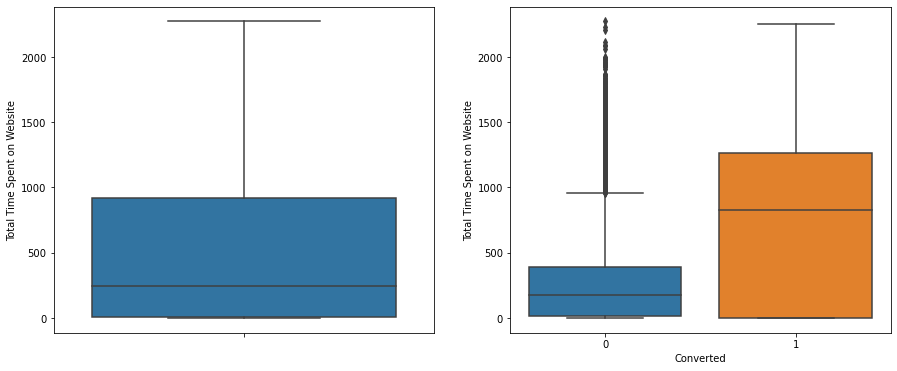

In [175]:
get_stats_and_numerical_segmented_plot('Total Time Spent on Website', [], True)

#### Inference :
 - We can observe that people spending more time on website have are likely to be converted


`'Page Views Per Visit'` Analysis

In [176]:
get_stats_and_numerical_segmented_plot('Page Views Per Visit', [], False)


Percentiles values for `Page Views Per Visit`


count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

As we can see there are few outliers which can be capped

In [177]:
percentiles = leads_df['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


Percentiles values for `Page Views Per Visit`


count    9074.000000
mean        2.265943
std         1.790991
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         6.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64


Plots comparison without and with Converted variable segmentation



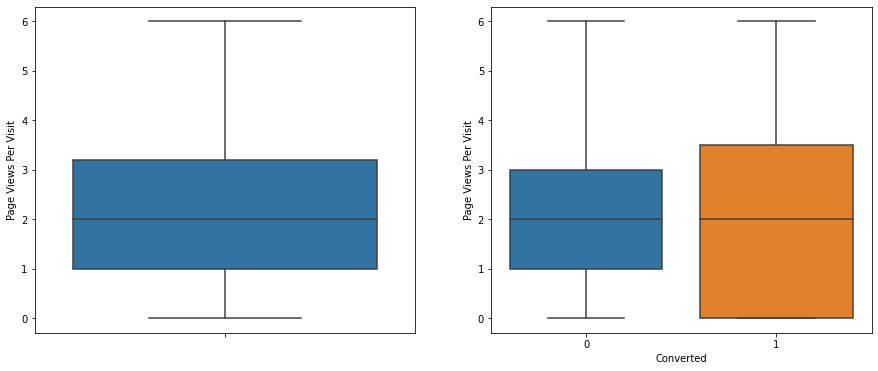

In [178]:
get_stats_and_numerical_segmented_plot('Page Views Per Visit', [], True)

#### Inference :
- Median for converted and unconverted leads is the same.

**Nothing can be inferred from Page Views Per Visit**

### Dropping few columns based on results of Univariate and Segmented Analysis

In [179]:
# As the following columns do not have much variation we can drop these columns for further analysis :
# What matters most to you in choosing a course,
# Search, Magazine, Newspaper Article, X Education Forums, Newspaper,
# Digital Advertisement, Through Recommendations, 
# Receive More Updates About Our Courses, 
# Update me on Supply Chain Content, 
# Get updates on DM Content
# I agree to pay the amount through cheque
# Since country data is heavily skewed towards India, we need to drop it. Also further details of India has been captured in city variable


columns_to_drop=['What matters most to you in choosing a course','Search', 'Magazine', 'Newspaper Article', 
                 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations',
                 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque', 'Country']

leads_df.drop(labels=columns_to_drop, axis=1 ,inplace=True)

print("Shape of leads_df - ",leads_df.shape)
print("Columns of leads_df - ",leads_df.columns)

Shape of leads_df -  (9074, 16)
Columns of leads_df -  Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


### Checking correlations of numerical columns with Converted

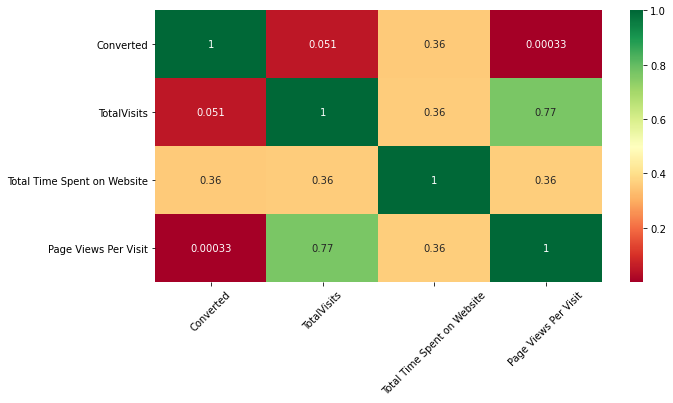

In [180]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=45)
sns.heatmap(leads_df.corr(), cmap="RdYlGn",annot=True)
plt.show()

#### Inference : 
- We can observe that 'Total Time Spent on Website' has postive Correlation with 'Conversion'
- There is almost no correlation in 'Page Views Per Visit' and 'TotalVisits' with 'Conversion'
- 'Page Views Per Visit' and 'Total Time Spend on Website' have highest correlation with 'Conversion'
- There seems to be some correlation between 'total visits' and 'page views per visit'

## Data Preparation

### Converting binary variables 'Do Not Email', 'Do Not Call','A free copy of Mastering The Interview' to 1/0

In [181]:
binary_vars =  ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']
leads_df[binary_vars] = leads_df[binary_vars].apply(lambda x : x.map({'Yes': 1, "No": 0}))

leads_df[binary_vars]

,Do Not Email,Do Not Call,A free copy of Mastering The Interview
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0
...,...,...,...
9235,1,0,0
9236,0,0,1
9237,1,0,1
9238,0,0,0


### Creating dummy variable for categorical columns 

In [182]:
categorical_columns = list(leads_df.select_dtypes(include=['object']).columns)
categorical_columns

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [183]:
dummy_vars = pd.get_dummies(leads_df[categorical_columns], drop_first=True)
dummy_vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_OtherTags,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [184]:
# Combining categorical dummy variable with leads_df
leads_df = pd.concat([leads_df, dummy_vars], axis=1)

# Dropping original categorical columns as we are using dummy variables 
leads_df.drop(labels=categorical_columns, axis = 1, inplace=True)

leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_OtherTags,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Splitting the data into Train and Test

In [185]:
from sklearn.model_selection import train_test_split

# Extracting all independent features to X
X = leads_df.drop(['Converted'], axis=1)
y = leads_df['Converted']

display_in_bold("Independent Variables Data")
display(X.head())

display_in_bold("Target Variable Data")
display(y.head())

Independent Variables Data


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_OtherTags,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Target Variable Data


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [186]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Next steps :
- Feature Scaling 
- Model Buildings 
- Evaluation 
- Recommendations / Conclusion

### Feature scaling / data scaling
Scaling is done using StandardScaler from scikit learn

In [187]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_OtherTags,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Building the model

#### The model will be built using statsmodels

In [188]:
# importing statsmodels
import statsmodels.api as sm

In [189]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6267
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.2
Date:                Mon, 11 Oct 2021   Deviance:                       2526.4
Time:                        11:40:05   Pearson chi2:                 2.67e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   26.8892   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.3445      0.325     -4.141      0.000      -1.981      -0.708
Do Not Call                                             21.6000   5.03e+04      0.000      1.000   -9.86e+04    9.86e+04
TotalVisits                                              0.1845      0.087      2.131      0.033       0.015       0.354
Total Time Spent on Website                              1.1384      0.063     17.928      0.000       1.014       1.263
Page Views Per Visit                                    -0.3238      0.098     -3.293      0.001      -0.517      -0.131
A free copy of Mastering The Interview                  -0.2617      0.175     -1.493      0.135      -0.605       0.082
Lead Origin_Landing Page Submission                     -0.9982      0.223     -4.477      0.000      -1.435      -0.561
Lead Origin_Lead Add Form                               -0.2815      1.321     -0.213      0.831      -2.870       2.307
Lead Origin_Lead Import                                 27.5764   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                   -26.6691   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                       0.0650      0.181      0.358      0.720      -0.290       0.420
Lead Source_Olark Chat                                   0.7610      0.243      3.130      0.002       0.284       1.238
Lead Source_Organic Search                               0.1722      0.211      0.815      0.415      -0.242       0.587
Lead Source_Others                                       0.6384      0.824      0.775      0.438      -0.976       2.253
Lead Source_Reference                                    1.6274      1.382      1.178      0.239      -1.081       4.336
Lead Source_Referral Sites                              -0.1791      0.494     -0.363      0.717      -1.146       0.788
Lead Source_Welingak Website                             5.2172      1.516      3.440      0.001       2.245       8.189
Last Activity_Converted to Lead                        -17.3224   3.65e+04     -0.000      1.000   -7.16e+04    7.15e+04
Last Activity_Email Bounced                            -17.8592   3.65e+04     -0.000      1.000   -7.16e+04    7.15e+04
Last Activity_Email Link Clicked                       -16.4851   3.65e+04     -0.000      1.000   -7.16e+04    7.15e+04
Last Activity_Email Opened                             -17.3014   3.65e+04     -0.000      1.000   -7.16e+04    7.15e+04
Last Activity_Form Submitted on Website                -17

#### The above model has a lot of variables with p-value > .05. Thus the model needs improvement by feature selection.
#### Running RFE with 20 variables should help build a better model

In [190]:


from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

# adding solver='liblinear'. As if it is not added the code is throwing an error AttributeError: 'str' object has no attribute 'decode'
# source for solution: https://stackoverflow.com/questions/65682019/attributeerror-str-object-has-no-attribute-decode-in-fitting-logistic-regre


In [191]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False])

In [192]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 26),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 30),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', False, 50),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Others', False, 44),
 ('Lead Source_Reference', False, 57),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 33),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 51),
 ('Last Activity_Form Submitted on Website', False, 63),
 ('Last Activity_Had a Phone Conversation', False, 2),
 ('Last Activity_Olark Cha

In [193]:
# assigning the result of ref.support to a variable col
col = X_train.columns[rfe.support_]

In [194]:
#dropping the col from X_train
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization

##### Assessing the model with StatsModels

In [195]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1337.4
Date:                Mon, 11 Oct 2021   Deviance:                       2674.7
Time:                        11:40:07   Pearson chi2:                 1.96e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1437      0.212     10.126      0.000       1.729       2.559
Do Not Email                                            -1.5299      0.249     -6.149      0.000      -2.017      -1.042
Total Time Spent on Website                              1.1317      0.060     18.745      0.000       1.013       1.250
Lead Origin_Lead Add Form                                2.3033      0.368      6.262      0.000       1.582       3.024
Lead Origin_Lead Import                                  1.7736      0.745      2.381      0.017       0.314       3.233
Lead Source_Olark Chat                                   1.3350      0.144      9.242      0.000       1.052       1.618
Lead Source_Welingak Website                             3.4390      0.821      4.186      0.000       1.829       5.049
Last Activity_Olark Chat Conversation                   -1.3858      0.206     -6.718      0.000      -1.790      -0.982
What is your current occupation_Working Professional     1.3409      0.318      4.211      0.000       0.717       1.965
Tags_Closed by Horizzon                                  3.9948      0.751      5.322      0.000       2.524       5.466
Tags_Interested  in full time MBA                       -4.0505      0.877     -4.616      0.000      -5.770      -2.331
Tags_Interested in other courses                        -4.0720      0.395    -10.317      0.000      -4.846      -3.298
Tags_Lost to EINS                                        5.0504      0.735      6.873      0.000       3.610       6.491
Tags_OtherTags                                          -4.3480      0.279    -15.569      0.000      -4.895      -3.801
Tags_Ringing                                            -5.1459      0.286    -17.990      0.000      -5.706      -4.585
Lead Quality_Might be                                   -1.1963      0.242     -4.951      0.000      -1.670      -0.723
Lead Quality_Not Sure                                   -3.8216      0.219    -17.425      0.000      -4.251      -3.392
Lead Quality_Worst                                      -4.0555      0.936     -4.331      0.000      -5.891      -2.220
Last Notable Activity_SMS Sent                           2.5064      0.128     19.556      0.000       2.255       2.758
Last Notable Activity_Unreachable                        1.1958      0.573      2.087      0.037       0.073       2.319
Last Notable Activity_Unsubscribed                       1.6340      0.792      2.063      0.039       0.082       3.186
========================================================================================================================
"""

In [196]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.134781
1012    0.077404
9226    0.001509
4750    0.936322
7987    0.996515
1281    0.988917
2880    0.064444
4971    0.951799
7536    0.994754
1248    0.008826
dtype: float64

In [197]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13478097, 0.07740428, 0.00150948, 0.9363222 , 0.9965148 ,
       0.98891707, 0.06444368, 0.9517988 , 0.99475415, 0.0088261 ])

##### Creating a dataframe with the actual convertion and the predicted probabilities

In [198]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.134781
1,0,0.077404
2,0,0.001509
3,1,0.936322
4,1,0.996515


##### Creating new column 'predicted_temp' with 1 if Converted_Prob > 0.5 else 0. This has been set up arbitrarily. The actual cut-off will be defined later using ROC. This is done to check the model performance by using confusion metrics

In [199]:
y_train_pred_final['predicted_temp'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted_temp
0,0,0.134781,0
1,0,0.077404,0
2,0,0.001509,0
3,1,0.936322,1
4,1,0.996515,1


#### Confusion matrix

In [200]:
from sklearn import metrics


In [201]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_temp )
print(confusion)

[[3701  204]
 [ 291 2155]]


In [202]:
# Predicted      converted    not converted
# Actual
# converted        3270         365
# not converted    579          708  

In [203]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_temp))

0.9220595181861124


#### Building model 1

In [204]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1337.4
Date:                Mon, 11 Oct 2021   Deviance:                       2674.7
Time:                        11:40:08   Pearson chi2:                 1.96e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1437      0.212     10.126      0.000       1.729       2.559
Do Not Email                                            -1.5299      0.249     -6.149      0.000      -2.017      -1.042
Total Time Spent on Website                              1.1317      0.060     18.745      0.000       1.013       1.250
Lead Origin_Lead Add Form                                2.3033      0.368      6.262      0.000       1.582       3.024
Lead Origin_Lead Import                                  1.7736      0.745      2.381      0.017       0.314       3.233
Lead Source_Olark Chat                                   1.3350      0.144      9.242      0.000       1.052       1.618
Lead Source_Welingak Website                             3.4390      0.821      4.186      0.000       1.829       5.049
Last Activity_Olark Chat Conversation                   -1.3858      0.206     -6.718      0.000      -1.790      -0.982
What is your current occupation_Working Professional     1.3409      0.318      4.211      0.000       0.717       1.965
Tags_Closed by Horizzon                                  3.9948      0.751      5.322      0.000       2.524       5.466
Tags_Interested  in full time MBA                       -4.0505      0.877     -4.616      0.000      -5.770      -2.331
Tags_Interested in other courses                        -4.0720      0.395    -10.317      0.000      -4.846      -3.298
Tags_Lost to EINS                                        5.0504      0.735      6.873      0.000       3.610       6.491
Tags_OtherTags                                          -4.3480      0.279    -15.569      0.000      -4.895      -3.801
Tags_Ringing                                            -5.1459      0.286    -17.990      0.000      -5.706      -4.585
Lead Quality_Might be                                   -1.1963      0.242     -4.951      0.000      -1.670      -0.723
Lead Quality_Not Sure                                   -3.8216      0.219    -17.425      0.000      -4.251      -3.392
Lead Quality_Worst                                      -4.0555      0.936     -4.331      0.000      -5.891      -2.220
Last Notable Activity_SMS Sent                           2.5064      0.128     19.556      0.000       2.255       2.758
Last Notable Activity_Unreachable                        1.1958      0.573      2.087      0.037       0.073       2.319
Last Notable Activity_Unsubscribed                       1.6340      0.792      2.063      0.039       0.082       3.186
========================================================================================================================
"""

#### The P values of all the variables are zero or < 0.05 and is better than the previous model. 

#### To improve this better and to make sure that none of the variables are correlated we can use VIF.  

### VIF

In [205]:
# importing the VIF library from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [206]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Lead Quality_Not Sure,2.22
4,Lead Source_Olark Chat,1.76
2,Lead Origin_Lead Add Form,1.74
14,Lead Quality_Might be,1.67
16,Lead Quality_Worst,1.64
12,Tags_OtherTags,1.64
17,Last Notable Activity_SMS Sent,1.62
6,Last Activity_Olark Chat Conversation,1.44
5,Lead Source_Welingak Website,1.37
1,Total Time Spent on Website,1.36


All the variables have values < 5. Thus this seems to be a good model. 

In [207]:
# Getting the Predicted values on the train set
y_train_pred = res1.predict(X_train_sm)
y_train_pred[:10]

3009    0.134781
1012    0.077404
9226    0.001509
4750    0.936322
7987    0.996515
1281    0.988917
2880    0.064444
4971    0.951799
7536    0.994754
1248    0.008826
dtype: float64

In [208]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13478097, 0.07740428, 0.00150948, 0.9363222 , 0.9965148 ,
       0.98891707, 0.06444368, 0.9517988 , 0.99475415, 0.0088261 ])

In [209]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.134781
1,0,0.077404
2,0,0.001509
3,1,0.936322
4,1,0.996515


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0. This is once again arbitrary. The cut off will be defined later using ROC

In [210]:
y_train_pred_final['predicted_1'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted_1
0,0,0.134781,0
1,0,0.077404,0
2,0,0.001509,0
3,1,0.936322,1
4,1,0.996515,1


### Final model evaluation

In [211]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_1 )
print(confusion)

[[3701  204]
 [ 291 2155]]


In [212]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_1))

0.9220595181861124


**The model has an overall accuracy of 92%!**

### Sensitivity and Specificity

In [213]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [214]:
# Calculating the sensitivity
TP/(TP+FN)

0.8810302534750614

In [215]:
# Calculating the specificity
TN/(TN+FP)

0.9477592829705506

**For the current model at cutoff of 0.5 we have accuracy = 92%, sensitivity 88%, and specificity 94%**

### Finding the optimal cut-off using ROC

### ROC Curve Plot

In [220]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [222]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

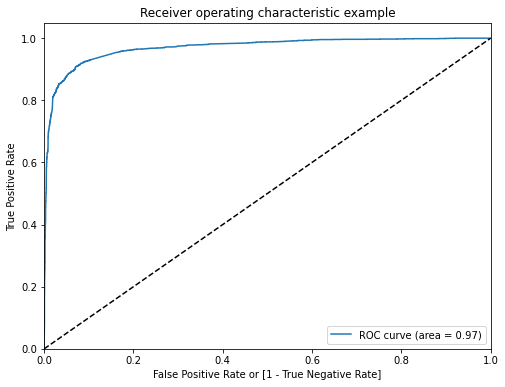

In [221]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### ROC plot helps us to find the right balance between specificty and sensitivity. 
- We can asses the goodness of the model by closeness of the curve towards top left corner of the diagonal line in the graph
- If the curve is closer to the top left of the grpah the model is performing good
- If the curve in the graph is closer to the diagonal line the model is not efficient and should go back to the drwaing board and rebuild the model with better features

#### Finding optimal cut-off threshold to find a balance between accuracy, sensitivity and specificity

In [230]:
# Let's create columns with different cutoff thresholds
cutoff_thresholds = [float(x)/20 for x in range(20)]

for i in cutoff_thresholds:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95
0,0,0.134781,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.077404,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.001509,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.936322,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0
4,1,0.996515,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1


In [231]:
# Calculating the metrices: accuracy sensitivity and specificity for various cutoff thresholds.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in cutoff_thresholds:
    confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(confusion_matrix))
    accuracy = (confusion_matrix[0,0]+confusion_matrix[1,1])/total
    
    speci = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
    sensi = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.385136  1.000000  0.000000
0.05  0.05  0.707133  0.986100  0.532394
0.10  0.10  0.825539  0.969338  0.735467
0.15  0.15  0.869784  0.960752  0.812804
0.20  0.20  0.880964  0.955437  0.834315
0.25  0.25  0.913557  0.925593  0.906018
0.30  0.30  0.917966  0.919052  0.917286
0.35  0.35  0.919068  0.912510  0.923175
0.40  0.40  0.920800  0.905560  0.930346
0.45  0.45  0.919540  0.894930  0.934955
0.50  0.50  0.922060  0.881030  0.947759
0.55  0.55  0.920485  0.864268  0.955698
0.60  0.60  0.921430  0.847506  0.967734
0.65  0.65  0.918281  0.830335  0.973367
0.70  0.70  0.916391  0.818479  0.977721
0.75  0.75  0.913714  0.806214  0.981050
0.80  0.80  0.896079  0.755519  0.984123
0.85  0.85  0.887734  0.728945  0.987196
0.90  0.90  0.872933  0.684383  0.991037
0.95  0.95  0.833727  0.576043  0.995134


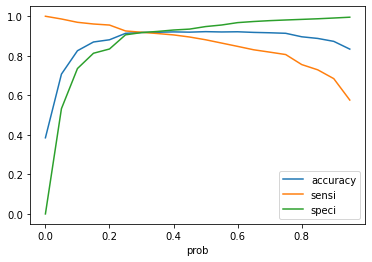

In [232]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the problem statement we have clear goals set by the CEO. The CEO in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Based on the above graph we can observe that cutoff-threshold of 0.75 gives us a sensitivity of 0.8 but a cut-off threshold of 0.3 gives us a very good balance between accuracy, sensitivity and specificity of about 91.5%. 

**We will be choosing the cutoff-threshold as 0.3 to strike a good balance among the following metrices : accuracy, sensitivity and specificity**

In [233]:
final_cutoff_threshold=0.3

In [234]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > final_cutoff_threshold else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,final_predicted
0,0,0.134781,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.077404,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.001509,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.936322,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1
4,1,0.996515,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1


#### Assigning Lead Score

In [236]:
# One of the clear goals specified is to assign a lead score between 0-100 
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100, 2))
y_train_pred_final.head()

,Converted,Converted_Prob,predicted_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,final_predicted,Lead_Score
0,0,0.134781,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13.48
1,0,0.077404,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7.74
2,0,0.001509,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.15
3,1,0.936322,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,93.63
4,1,0.996515,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,99.65


#### Training Data Metrics from Final Model

In [243]:
training_confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

TP = training_confusion_matrix[1,1] # true positive 
TN = training_confusion_matrix[0,0] # true negatives
FP = training_confusion_matrix[0,1] # false positives
FN = training_confusion_matrix[1,0] # false negatives

display_in_bold("Confusion Matrix from Final Model") 
training_confusion_matrix

Confusion Matrix from Final Model


array([[3582,  323],
       [ 198, 2248]], dtype=int64)

In [248]:
training_accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
training_sensitivity = TP / float(TP+FN)
training_specificty = TN / float(TN+FP)

display_in_bold("Training Metrices") 
print("\nAccuracy:{0}, \nSensitivity:{0}, \nSpecificity:{0}".format(training_accuracy, training_sensitivity, 
                                                                    training_specificty))

Training Metrices

Accuracy:0.9179656746968982, 
Sensitivity:0.9179656746968982, 
Specificity:0.9179656746968982


### Model Evaluation on Testing Dataset

In [258]:
print("Final features used to build the model :") 
print(col)

Final features used to build the model :
Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_OtherTags', 'Tags_Ringing', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')


#### Scaling the numerical features using the same scaler used on training data

In [259]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_OtherTags,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.284772,-0.600595,0.955505,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.643547,1.887326,1.510766,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.432779,-0.752879,-0.155018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,-1.150329,-0.888650,-1.265540,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.719873,-0.587751,2.066027,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [261]:
# Using only the final list of features used for model buidling 
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_OtherTags,Tags_Ringing,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1490,0,1.887326,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4216,0,-0.888650,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [262]:
# Making predicitons on testing data 
X_test_sm = sm.add_constant(X_test)
y_test_pred = res1.predict(X_test_sm)
y_test_pred[:10]

3271    0.086459
1490    0.996390
7936    0.073781
4216    0.999411
3830    0.087614
1800    0.933182
6507    0.006335
4821    0.003627
4223    0.997395
4714    0.206096
dtype: float64

In [263]:
y_test

3271    0
1490    1
7936    0
4216    1
3830    0
       ..
850     0
2879    0
6501    1
7155    0
376     0
Name: Converted, Length: 2723, dtype: int64

In [265]:
test_results_df = pd.DataFrame({"Converted" : y_test, "PredictedConvertedProb" : y_test_pred})
test_results_df.head()

,Converted,PredictedConvertedProb
3271,0,0.086459
1490,1,0.996390
7936,0,0.073781
4216,1,0.999411
3830,0,0.087614


In [266]:
test_results_df['PredictedConverted'] = test_results_df.PredictedConvertedProb.map(lambda x: 1 if x > final_cutoff_threshold else 0)
test_results_df.head()

,Converted,PredictedConvertedProb,PredictedConverted
3271,0,0.086459,0
1490,1,0.996390,1
7936,0,0.073781,0
4216,1,0.999411,1
3830,0,0.087614,0


#### Testing Data Metrices 

In [269]:
testing_confusion_matrix = metrics.confusion_matrix(test_results_df.Converted, test_results_df.PredictedConverted )

TP = testing_confusion_matrix[1,1] # true positive 
TN = testing_confusion_matrix[0,0] # true negatives
FP = testing_confusion_matrix[0,1] # false positives
FN = testing_confusion_matrix[1,0] # false negatives

display_in_bold("Confusion Matrix of Testing Data using Final Model") 
testing_confusion_matrix

Confusion Matrix of Testing Data using Final Model


array([[1579,  155],
       [  90,  899]], dtype=int64)

In [270]:
testing_accuracy = metrics.accuracy_score(test_results_df.Converted, test_results_df.PredictedConverted)
testing_sensitivity = TP / float(TP+FN)
testing_specificty = TN / float(TN+FP)

display_in_bold("Testing Data Metrices") 
print("\nAccuracy:{0}, \nSensitivity:{0}, \nSpecificity:{0}".format(testing_accuracy, testing_sensitivity, 
                                                                    testing_specificty))

Testing Data Metrices

Accuracy:0.910025706940874, 
Sensitivity:0.910025706940874, 
Specificity:0.910025706940874


### As both the metrices for training and testing data from the model are good we can conclude our final model is good 

In [274]:
# Final Model Summary
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1337.4
Date:                Mon, 11 Oct 2021   Deviance:                       2674.7
Time:                        13:36:51   Pearson chi2:                 1.96e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1437      0.212     10.126      0.000       1.729       2.559
Do Not Email                                            -1.5299      0.249     -6.149      0.000      -2.017      -1.042
Total Time Spent on Website                              1.1317      0.060     18.745      0.000       1.013       1.250
Lead Origin_Lead Add Form                                2.3033      0.368      6.262      0.000       1.582       3.024
Lead Origin_Lead Import                                  1.7736      0.745      2.381      0.017       0.314       3.233
Lead Source_Olark Chat                                   1.3350      0.144      9.242      0.000       1.052       1.618
Lead Source_Welingak Website                             3.4390      0.821      4.186      0.000       1.829       5.049
Last Activity_Olark Chat Conversation                   -1.3858      0.206     -6.718      0.000      -1.790      -0.982
What is your current occupation_Working Professional     1.3409      0.318      4.211      0.000       0.717       1.965
Tags_Closed by Horizzon                                  3.9948      0.751      5.322      0.000       2.524       5.466
Tags_Interested  in full time MBA                       -4.0505      0.877     -4.616      0.000      -5.770      -2.331
Tags_Interested in other courses                        -4.0720      0.395    -10.317      0.000      -4.846      -3.298
Tags_Lost to EINS                                        5.0504      0.735      6.873      0.000       3.610       6.491
Tags_OtherTags                                          -4.3480      0.279    -15.569      0.000      -4.895      -3.801
Tags_Ringing                                            -5.1459      0.286    -17.990      0.000      -5.706      -4.585
Lead Quality_Might be                                   -1.1963      0.242     -4.951      0.000      -1.670      -0.723
Lead Quality_Not Sure                                   -3.8216      0.219    -17.425      0.000      -4.251      -3.392
Lead Quality_Worst                                      -4.0555      0.936     -4.331      0.000      -5.891      -2.220
Last Notable Activity_SMS Sent                           2.5064      0.128     19.556      0.000       2.255       2.758
Last Notable Activity_Unreachable                        1.1958      0.573      2.087      0.037       0.073       2.319
Last Notable Activity_Unsubscribed                       1.6340      0.792      2.063      0.039       0.082       3.186
========================================================================================================================
"""

## Final Observations and Closing Comments

In [ ]:
# Please review the model evaluations and updated this section